

# Project: Analysis of TMDB movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will provide a brief of the TMDB movies and its contain around 10,000 movie and will review some visualization for the most important questions.

We will provide some questions as:

            1- Which year has the highest / lowest profit of movies?
            2- What is the movie with a longest rumtime ?
            3- Which type of movie has the highest popularity ?

* First thing first we will import some important functions

In [1]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


> In this section we will clear the unused data to can analyze it and answer the questions easily.

### General Properties

In [2]:
#Here we will load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Here we remove some unused data to the project
df.drop(['id','imdb_id','cast','homepage','tagline','overview','budget_adj','revenue_adj','keywords','director','production_companies'],axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [4]:
# Rename a title of original_title to Movie_name  
df.rename(columns={'original_title':'Movie_name'},inplace=True)
df.head(1)

,popularity,budget,revenue,Movie_name,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [5]:
#check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   Movie_name    10866 non-null  object 
 4   runtime       10866 non-null  int64  
 5   genres        10843 non-null  object 
 6   release_date  10866 non-null  object 
 7   vote_count    10866 non-null  int64  
 8   vote_average  10866 non-null  float64
 9   release_year  10866 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


In [6]:
#explore the describe of the data.
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> * After wrangling the data we will move to the next step to cleanig the data.


### Data Cleaning (Remove the unused data to make it more readable)

In [7]:
# when exploring the data we saw that there some missing data in the generes row ,
#So we will drop it from our data.
df[df.genres.isnull()]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10843 non-null  float64
 1   budget        10843 non-null  int64  
 2   revenue       10843 non-null  int64  
 3   Movie_name    10843 non-null  object 
 4   runtime       10843 non-null  int64  
 5   genres        10843 non-null  object 
 6   release_date  10843 non-null  object 
 7   vote_count    10843 non-null  int64  
 8   vote_average  10843 non-null  float64
 9   release_year  10843 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 931.8+ KB


In [8]:
# make the row of "rlease_date" as a date instead of str
df['release_date'] =  pd.to_datetime(df['release_date'])
df.head()

,popularity,budget,revenue,Movie_name,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [9]:
#Now review
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10843 non-null  float64       
 1   budget        10843 non-null  int64         
 2   revenue       10843 non-null  int64         
 3   Movie_name    10843 non-null  object        
 4   runtime       10843 non-null  int64         
 5   genres        10843 non-null  object        
 6   release_date  10843 non-null  datetime64[ns]
 7   vote_count    10843 non-null  int64         
 8   vote_average  10843 non-null  float64       
 9   release_year  10843 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 931.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> * After the wrangling and cleaning the data we need to move on the next section (Explore the data) , Here we will visualize the data and compute statistics.


### Research Question 1 : Which year has the highest / lowest profit of movies?

* Initially we will insert a column constant the net profit.

In [10]:
#insert a column constant the net profit (Revenue less expenses)
df.insert(3,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,popularity,budget,revenue,profit_earned,Movie_name,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


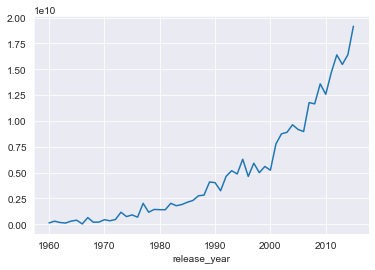

In [11]:
# We will sum all the profit for each year.
total_profit = df.groupby('release_year').profit_earned.sum()
# use matplotlib to visulize the data , and we will use line plot
total_profit.plot(x="Year",y="Profit",kind='line');

* The line bar clarify that the profit grow up till 2010 and there high grow up from 2000 to 2005.

In [12]:
#highst profit
total_profit.idxmax()

2015

In [13]:
#Lowest profit
total_profit.idxmin()

1966

* The highest profit is in the year 2015 and the lowest profit in 1966


### Research Question  2: What is the movie with a longest rumtime ?

In [14]:
print(df.Movie_name[df.runtime==df.runtime.max()])
print(df.runtime[df.runtime==df.runtime.max()])

3894    The Story of Film: An Odyssey
Name: Movie_name, dtype: object
3894    900
Name: runtime, dtype: int64


* The movie name is "The Story of Film: An Odyssey" is the longest movie with a total time "900" minutes

### Research Question 3  : Which type of movie has the highest  popularity ?

* First we need to split this symbol "|" to preview the data clearly

In [15]:
#First we should to split the symbol "|"
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
#then preview the result
df.head()

,popularity,budget,revenue,profit_earned,Movie_name,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015


* Then preview the average of the popularity data for each genre

In [16]:
# preview the average of the popularity for each genre
genres_popularity = df.groupby(['genres'])['popularity'].mean()
print (genres_popularity)

genres
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.693807
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64


* Now movie to the next step visualize the data

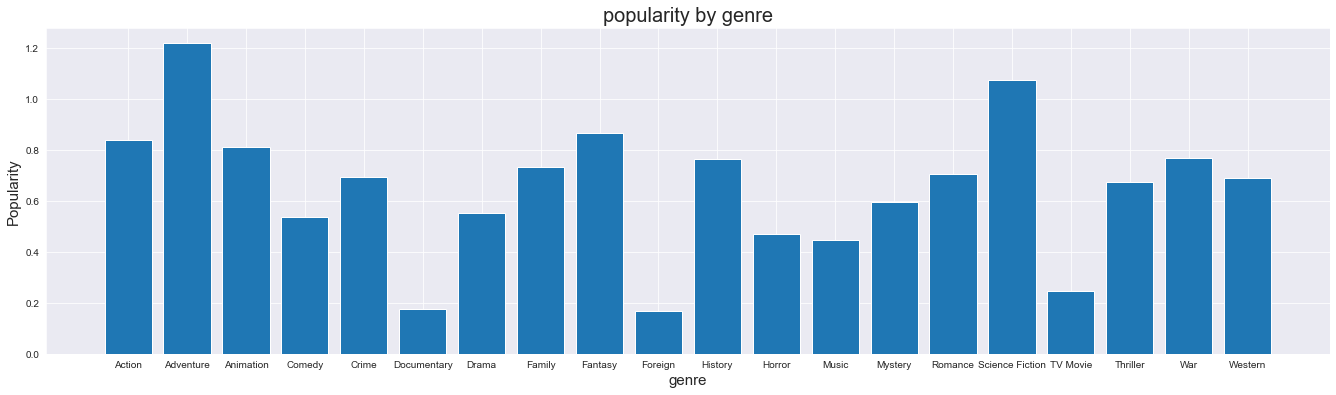

In [17]:
#Visulize the data by using bar chart

#maxmize the vision to be more clear
plt.subplots(figsize=(23, 6))
# Use bar chart for this question.
plt.bar(genres_popularity.index, genres_popularity)
plt.title('popularity by genre',fontsize=20)
plt.xlabel('genre',fontsize=15)
plt.ylabel('Popularity',fontsize=15);

* As appeared the pepole are like the adventure movies more than other and the 2nd one is science movies.

<a id='conclusions'></a>
## Conclusions


* The data was provided was very helpful but if there is no data missing such as runtime and genres it would be more clearful.

* We would suggest some data may added to make the data more effective such as the reward taken for each movie and the number of the movies that provided from the production company.

* the result of the Q1 "Which year has the highest / lowest profit of movies?" clarified that the the highest profit was in 2015 may it besed on the type of movie shown in this year and if we go down we find that the most movies prefered for the people is the adventure movies and then science fiction.